#  Atmospheric carbon dioxide

In [3]:
import urllib.request
import numpy as np
import pandas as pd
#Pass the given url.
url="ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt"
# For data
data="co2_mm_mlo.txt"
# We will send request to load our data.
urllib.request.urlretrieve(url,data)

('co2_mm_mlo.txt', <email.message.Message at 0x26096a1a680>)

In [4]:
#Now my data is in string form so i need to do data munging to get data into arrays.
df_=np.genfromtxt(data,skip_header=60) # Skipping initial lines to get our data.

In [8]:
#Converting into dataframe.
data=pd.DataFrame(df_)

In [9]:
data.head()

,0,1,2,3,4,5,6,7
0,1959.0,9.0,1959.7068,313.84,316.73,-1.0,-9.99,-0.99
1,1959.0,10.0,1959.7890,313.33,316.33,-1.0,-9.99,-0.99
2,1959.0,11.0,1959.8740,314.81,316.68,-1.0,-9.99,-0.99
3,1959.0,12.0,1959.9562,315.58,316.35,-1.0,-9.99,-0.99
4,1960.0,1.0,1960.0410,316.43,316.40,-1.0,-9.99,-0.99


In [7]:
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from sklearn.linear_model import LinearRegression

C:\Users\prash\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


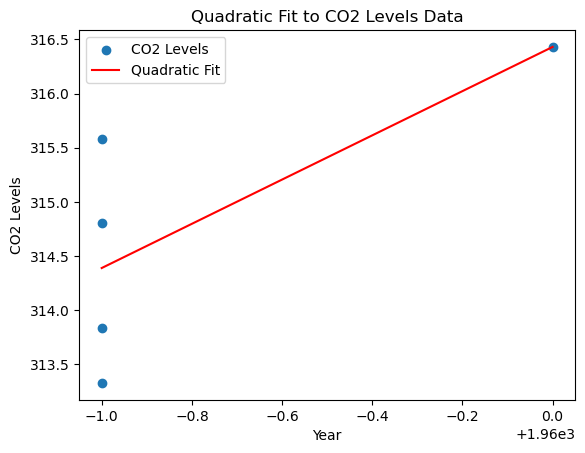

Estimated rate of change: 2.0405 ppm/year


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
data_points = np.array([
    [1959.0, 9.0, 1959.7068, 313.84, 316.73, -1.0, -9.99, -0.99],
    [1959.0, 10.0, 1959.7890, 313.33, 316.33, -1.0, -9.99, -0.99],
    [1959.0, 11.0, 1959.8740, 314.81, 316.68, -1.0, -9.99, -0.99],
    [1959.0, 12.0, 1959.9562, 315.58, 316.35, -1.0, -9.99, -0.99],
    [1960.0, 1.0, 1960.0410, 316.43, 316.40, -1.0, -9.99, -0.99]
])

# Extracting the relevant columns
years = data_points[:, 0]
co2_levels = data_points[:, 3]

# Fit a quadratic function to the data
quadratic_coefficients = np.polyfit(years, co2_levels, 2)
quadratic_function = np.poly1d(quadratic_coefficients)

# Deriving the derivative of the quadratic function
derivative_function = np.poly1d([2 * quadratic_coefficients[0], quadratic_coefficients[1]])

# Estimating the rate of change
rate_of_change_estimate = derivative_function(years[-1])

# Plot the data and the fitted quadratic curve
plt.scatter(years, co2_levels, label='CO2 Levels')
plt.plot(years, quadratic_function(years), label='Quadratic Fit', color='red')
plt.xlabel('Year')
plt.ylabel('CO2 Levels')
plt.title('Quadratic Fit to CO2 Levels Data')
plt.legend()
plt.show()

# Print the rate of change estimate
print(f"Estimated rate of change: {rate_of_change_estimate:.4f} ppm/year")
